<a href="https://colab.research.google.com/github/114576u/machine-learning/blob/master/linear-regression-with-a-real-dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This is obtained from 
# https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_a_real_dataset.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=linear_regression_real_tf2-colab&hl=en#scrollTo=JZlvdpyYKx7V
# in the context of the machine learning training from
# https://developers.google.com/machine-learning/crash-course/first-steps-with-tensorflow/programming-exercises

In [5]:

import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# the following lines adjust the granularity of reporting
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [2]:
# import the dataset
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# scale the label
training_df["median_house_value"] /= 1000.0

# print the first rows of the pandas DataFrame
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


In [3]:

# get statistics on the dataset
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


In [4]:

# define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # most simple tf.keras models are sequential
  model = tf.keras.models.Sequential()

  # describe the topography of the model.
  # the topography of a simple linear regression model
  # is a single node in a single layer
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate), loss="mean_squared_error", metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model

def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # feed the model the featre and the label
  # the model will train for the specified number of epochs
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs
                      )
  
  # gather the trained model's weight and bias
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # the list of epochs is sotred separately from the rest of history
  epochs = history.epoch

  # isolate the error for each epoch
  hist = pd.DataFrame(history.history)

  # to track the progression of trianing, we're going to take a snapshot
  # of the model's root mean squared error at each epoch
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the build_model and the train_model functions")

Defined the build_model and the train_model functions


In [6]:

# we are defining now the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # label the axes
  plt.xlabel(feature)
  plt.ylabel(label)

  # create a scatter plot from 200 random points of the dataset
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1)
  x0 = 0
  y0 = trained_bias
  x1 = random_examples[feature].max()
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # render the scatter plot and the red line
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs.epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [ ]:

# call the model functions

# the following variables are the hyperparameters
learning_rate = 0.01
epochs = 3000
batch_size = 30

# specify the feature and the label
my_feature = "total_rooms"      # the total number of rooms on a specific city block
my_label = "median_house_value" # the median value of a house on a specific city block
# that is, we are going to create a model that predicts house value based solely on total_rooms

# discarding any pre-existing version of the model
my_model = None

# invoke the functions
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, my_feature, my_label, epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("\The learned bias for your model is %.4f\n" % bias)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/3000


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


567/567 [==============================] - 1s 1ms/step - loss: 64338.8594 - root_mean_squared_error: 253.6511
Epoch 2/3000
567/567 [==============================] - 1s 1ms/step - loss: 27650.5391 - root_mean_squared_error: 166.2845
Epoch 3/3000
567/567 [==============================] - 1s 1ms/step - loss: 27138.1094 - root_mean_squared_error: 164.7365
Epoch 4/3000
567/567 [==============================] - 1s 1ms/step - loss: 26335.3652 - root_mean_squared_error: 162.2818
Epoch 5/3000
567/567 [==============================] - 1s 1ms/step - loss: 25611.4922 - root_mean_squared_error: 160.0359
Epoch 6/3000
567/567 [==============================] - 1s 1ms/step - loss: 24811.7207 - root_mean_squared_error: 157.5174
Epoch 7/3000
567/567 [==============================] - 1s 1ms/step - loss: 24255.7285 - root_mean_squared_error: 155.7425
Epoch 8/3000
567/567 [==============================] - 1s 1ms/step - loss: 23636.4043 - root_mean_squared_error: 153.7413
Epoch 9/3000
567/567 [=======

In [8]:

# use the model to make predictions

def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = training_df[feature][10000:10000 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature  label         predicted")
  print(" value   value         value")
  print("         in thousand$  in thousand$")
  print("-----------------------------------")
  for i in range(n):
    print("%5.0f %6.0f %15.0f" % (
        training_df[feature][10000 + i],
        training_df[label][10000 + i],
        predicted_values[i][0] )
    )

In [9]:

# invoke the house prediction function on 10 examples:

predict_house_values(10, my_feature, my_label)

# label is the real value and predicted is what our model obtains. In this case, (run the cell in case it's not ran already), prediction is very bad

feature  label         predicted
 value   value         value
         in thousand$  in thousand$
-----------------------------------
 1960     53             177
 3400     92             210
 3677     69             217
 2202     62             182
 2403     80             187
 5652    295             263
 3318    500             208
 2552    342             191
 1364    118             163
 3468    128             212


Epoch 1/3


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


142/142 [==============================] - 0s 1ms/step - loss: 3474777.0000 - root_mean_squared_error: 1864.0753
Epoch 2/3
142/142 [==============================] - 0s 1ms/step - loss: 3303870.0000 - root_mean_squared_error: 1817.6550
Epoch 3/3
142/142 [==============================] - 0s 1ms/step - loss: 3327264.2500 - root_mean_squared_error: 1824.0790


/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


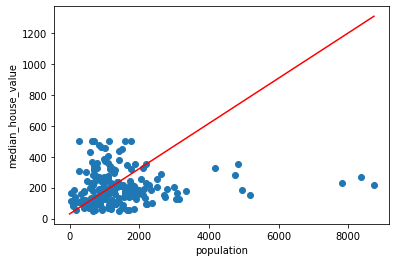

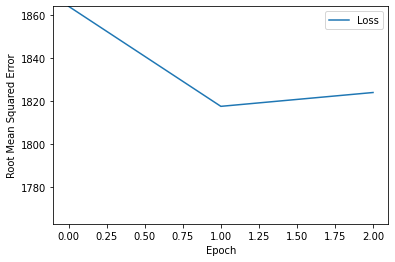

feature  label         predicted
 value   value         value
         in thousand$  in thousand$
-----------------------------------
 1286     53             218
 1867     92             303
 2191     69             351
 1052     62             184
 1647     80             271
 2312    295             368
 1604    500             265
 1066    342             186
  338    118              80
 1604    128             265


In [12]:

# we'll try a different feature to check whether we get better prediction results

my_feature = "population"

# we also experiment with hyperparameters
learning_rate = 2
epochs = 3
batch_size = 120

my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(10, my_feature, my_label)

In [ ]:
my_feature = "population" # Pick a feature other than "total_rooms"

# Possibly, experiment with the hyperparameters.
learning_rate = 0.05
epochs = 18
batch_size = 3

# Don't change anything below.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(10, my_feature, my_label)